# Part 3.1 – Individual Athlete Visualization (Pair Work)

**Contributor:** Jonathan Jafari  
**Athletes:** PLAYER_680, PLAYER_965  
**Metric:** Jump Height (m)  
**Figure file (screenshot requirement):** `screenshots/part3_player680_line_plot.png`

This notebook connects to the shared MySQL database, filters the Vert system data for two specific basketball athletes, and visualizes **Jump Height(m)** over time. The first figure (PLAYER_680) is saved as a PNG for the assignment screenshot; the second figure (PLAYER_965) is rendered in the notebook.

In [28]:
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine, text
import pandas as pd


load_dotenv()

DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
DB_TABLE = os.getenv("DB_TABLE")

connection_string = (
    f"mysql+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
)

engine = create_engine(connection_string)

df = pd.read_sql(text(f"SELECT * FROM {DB_TABLE} LIMIT 50000"), engine)
df.head()


,id,playername,timestamp,device,metric,value,team,session_type,session_description,function_description,data_source,created_at
0,1,PLAYER_1175,2018-10-15 19:27:41,hawkins,Avg. Braking Force(N),1546.3816,Team: Stony Brook,None,None,None,hawkins,2025-10-21 16:46:54
1,2,PLAYER_1175,2018-10-15 19:27:41,hawkins,Avg. Braking Power(W),-1099.2175,Team: Stony Brook,None,None,None,hawkins,2025-10-21 16:46:54
2,3,PLAYER_1175,2018-10-15 19:27:41,hawkins,Avg. Braking Velocity(m/s),-0.7630,Team: Stony Brook,None,None,None,hawkins,2025-10-21 16:46:54
3,4,PLAYER_1175,2018-10-15 19:27:41,hawkins,Avg. Landing Force(N),1251.3600,Team: Stony Brook,None,None,None,hawkins,2025-10-21 16:46:54
4,5,PLAYER_1175,2018-10-15 19:27:41,hawkins,Avg. Propulsive Force(N),1887.0421,Team: Stony Brook,None,None,None,hawkins,2025-10-21 16:46:54


In [29]:
# List most common metrics to help select one
metric_counts = df["metric"].value_counts().head(40)
metric_counts


metric
System Weight(N)                           687
Avg. Landing Force(N)                      678
Relative Peak Landing Force(%)             677
Peak Landing Force(N)                      677
L|R Avg. Landing Force(%)                  676
L|R Peak Landing Force(%)                  676
Landing Stiffness(N/m)                     675
Avg. Propulsive Force(N)                   671
Avg. Propulsive Power(W)                   671
Avg. Propulsive Velocity(m/s)              671
Avg. Relative Propulsive Force(%)          671
Positive Net Impulse(N.s)                  671
Jump Height(m)                             671
Takeoff Velocity(m/s)                      670
Propulsive Phase(s)                        670
Peak Velocity(m/s)                         670
Peak Propulsive Power(W)                   670
Peak Propulsive Force(N)                   670
Propulsive Net Impulse(N.s)                670
L|R Propulsive Impulse Index(%)            669
L|R Peak Propulsive Force(%)               669
L|R Av

In [30]:
# Replace with the chosen metric name from metric_counts output
metric_of_interest = "Jump Height(m)"

players_with_metric = (
    df[df["metric"] == metric_of_interest]["playername"]
    .value_counts()
    .head(20)
)

players_with_metric


playername
PLAYER_680     22
PLAYER_965     21
PLAYER_893     20
PLAYER_032     19
PLAYER_1208    18
PLAYER_1167    17
PLAYER_664     16
PLAYER_892     16
PLAYER_1204    15
PLAYER_430     14
PLAYER_752     13
PLAYER_643     13
PLAYER_528     12
PLAYER_070     11
PLAYER_753     10
PLAYER_624      9
PLAYER_708      7
PLAYER_185      6
PLAYER_826      6
PLAYER_594      6
Name: count, dtype: int64

In [31]:
player_1 = "PLAYER_680"
player_2 = "PLAYER_965"
metric_of_interest = "Jump Height(m)"


In [32]:
import matplotlib.pyplot as plt

def plot_player_timeline(player_name, filename=None):
    # Filter for one athlete + metric
    subset = df[
        (df["playername"] == player_name) &
        (df["metric"] == metric_of_interest)
    ].copy()

    subset = subset.sort_values("timestamp")

    # Line plot
    plt.figure(figsize=(12, 5))
    plt.plot(subset["timestamp"], subset["value"], marker='o')
    plt.xlabel("Date")
    plt.ylabel(metric_of_interest)
    plt.title(f"{metric_of_interest} Over Time for {player_name}")
    plt.xticks(rotation=45)
    plt.tight_layout()

    if filename is not None:
        plt.savefig(filename, dpi=300)

    plt.show()



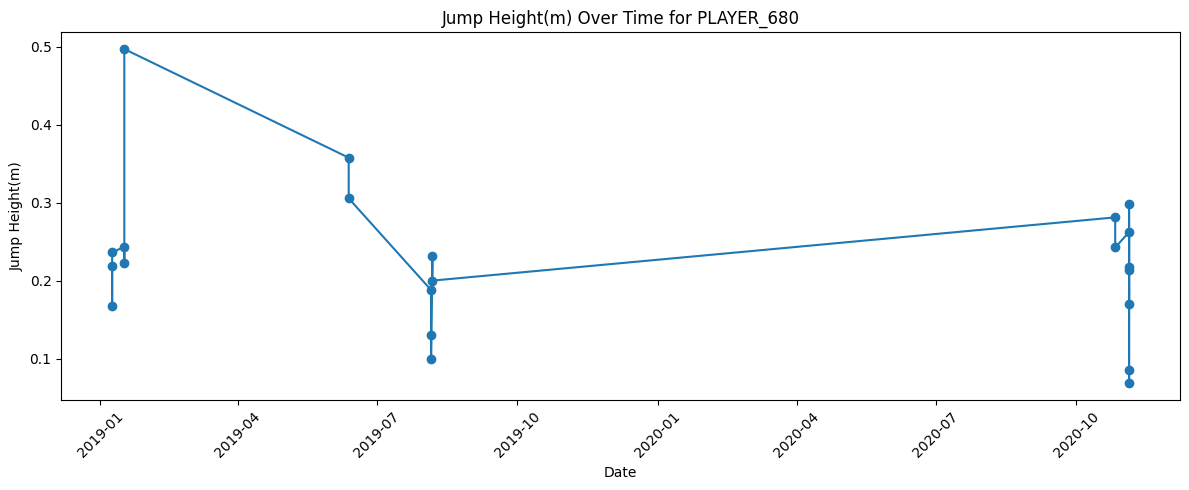

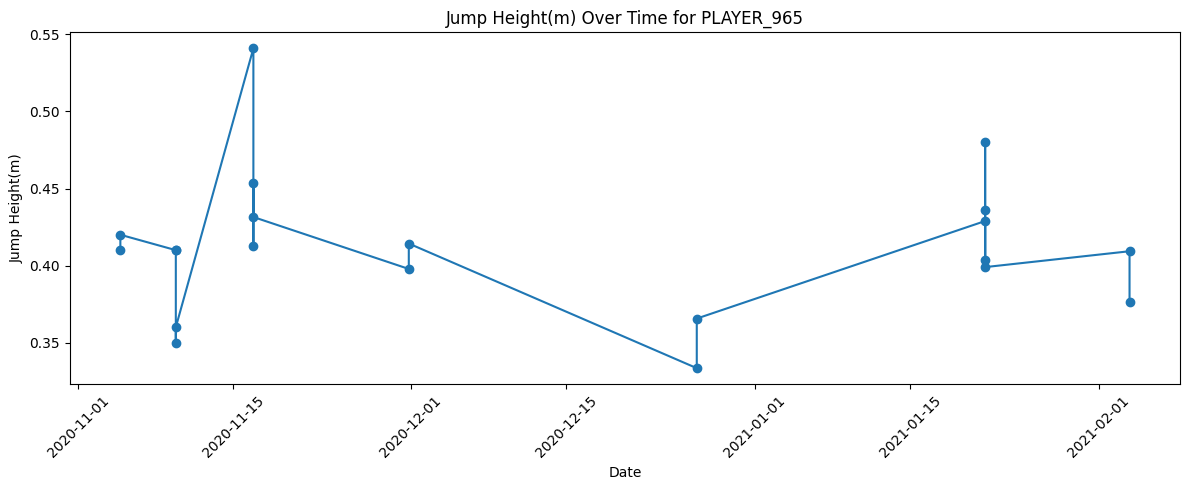

In [35]:
# PLAYER_680 – main screenshot figure
plot_player_timeline(
    player_name=player_1,
    filename="screenshots/jonathan_part3_player680_line_plot.png"
)

# PLAYER_965 – second athlete screenshot
plot_player_timeline(
    player_name=player_2,
    filename="screenshots/jonathan_part3_player965_line_plot.png"
)


# Part 3.1 – Data Cleaning & Transformation
# Contributor: Xiao Hong Chen
# ----------------------------------------------

In [ ]:
%pip install scipy
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine, text
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

load_dotenv()

DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
DB_TABLE = os.getenv("DB_TABLE")

connection_string = (
    f"mysql+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
)

engine = create_engine(connection_string)

print("Database connection established successfully.")

df = pd.read_sql(text(f"SELECT * FROM {DB_TABLE}"), engine)
print("Data retrieved successfully.\n")
df.head()


selected_metrics = [
    "Jump Height(m)",
    "Peak Propulsive Force(N)",
    "Peak Velocity(m/s)",
    "Propulsive Net Impulse(N.s)",
    "mRSI",
]


Note: you may need to restart the kernel to use updated packages.
Database connection established successfully.
Data retrieved successfully.



In [ ]:
# filter teams based on coverage of selected metrics
metrics_sql = ", ".join([f"'{m}'" for m in selected_metrics])

query_team_coverage = f"""
SELECT 
    team,
    COUNT(DISTINCT metric) AS num_metrics_found
FROM {DB_TABLE}
WHERE metric IN ({metrics_sql})
GROUP BY team
ORDER BY num_metrics_found DESC;
"""

team_coverage = pd.read_sql(text(query_team_coverage), engine)
team_coverage

,team,num_metrics_found
0,Team: Old Football,5
1,Team: Stony Brook Men's Soccer,5
2,"Team: Stony Brook Men's Basketball , Team: Men...",5
3,Team: Stony Brook Men's Basketball,5
4,"Team: Stony Brook Football, Team: Stony Brook",5
...,...,...
67,"Group: Football Bigs, Team: Stony Brook Football",5
68,"Group: Football Big Skill, Team: Stony Brook, ...",5
69,"Group: Football Big Skill, Team: Stony Brook F...",5
70,"Group: 2023-2024 WBB, Group: Women's Basketbal...",5


In [ ]:
# Filter players who have all 5 selected metrics from the chosen team
chosen_team = "Team: Stony Brook Men's Basketball".replace("'","''")
query_playersallmetrics = f"""
SELECT
    playername,
    COUNT(DISTINCT metric) AS num_metrics,team
FROM {DB_TABLE}
WHERE team = '{chosen_team}'
  AND metric IN ({metrics_sql})
GROUP BY playername
HAVING num_metrics = {len(selected_metrics)}
ORDER BY team
"""

df_playersallmetrics = pd.read_sql(text(query_playersallmetrics), engine)
df_playersallmetrics

,playername,num_metrics,team
0,PLAYER_002,5,Team: Stony Brook Men's Basketball
1,PLAYER_074,5,Team: Stony Brook Men's Basketball
2,PLAYER_1036,5,Team: Stony Brook Men's Basketball
3,PLAYER_1050,5,Team: Stony Brook Men's Basketball
4,PLAYER_1188,5,Team: Stony Brook Men's Basketball
5,PLAYER_1282,5,Team: Stony Brook Men's Basketball
6,PLAYER_1283,5,Team: Stony Brook Men's Basketball
7,PLAYER_1285,5,Team: Stony Brook Men's Basketball
8,PLAYER_243,5,Team: Stony Brook Men's Basketball
9,PLAYER_324,5,Team: Stony Brook Men's Basketball


In [ ]:
# PLAYER_999 and PLAYER_404 has been chosen for our metrics
# create my main database and clean up types on data for plotting function
player_list = ["PLAYER_999", "PLAYER_404"]
player_sql = ", ".join([f"'{p.replace("'", "''")}'" for p in player_list])

query_team_metrics = f"""
SELECT * 
FROM {DB_TABLE}
WHERE team = '{chosen_team}'
AND playername IN ({player_sql})
AND metric IN ({metrics_sql});
"""
df_team = pd.read_sql(text(query_team_metrics),engine)

df_team["timestamp"] = pd.to_datetime(df_team['timestamp'])
df_team["value"] = pd.to_numeric(df_team['value'], errors ='coerce')

print(df_team.shape)
df_team.head()

(620, 12)


,id,playername,timestamp,device,metric,value,team,session_type,session_description,function_description,data_source,created_at
0,5868614,PLAYER_404,2025-06-23 14:19:39,hawkins,Jump Height(m),0.4595,Team: Stony Brook Men's Basketball,None,None,None,hawkins,2025-10-21 17:01:10
1,5868643,PLAYER_404,2025-06-23 14:19:39,hawkins,Peak Propulsive Force(N),2355.0000,Team: Stony Brook Men's Basketball,None,None,None,hawkins,2025-10-21 17:01:10
2,5868649,PLAYER_404,2025-06-23 14:19:39,hawkins,Peak Velocity(m/s),3.0826,Team: Stony Brook Men's Basketball,None,None,None,hawkins,2025-10-21 17:01:10
3,5868653,PLAYER_404,2025-06-23 14:19:39,hawkins,Propulsive Net Impulse(N.s),253.5380,Team: Stony Brook Men's Basketball,None,None,None,hawkins,2025-10-21 17:01:10
4,5868676,PLAYER_404,2025-06-23 14:19:39,hawkins,mRSI,0.6418,Team: Stony Brook Men's Basketball,None,None,None,hawkins,2025-10-21 17:01:10


In [34]:
def plot_athlete_metrics(df_team, athlete, selected_metrics, months_back=12):
    df_a = df_team[df_team["playername"] == athlete].copy()
    if df_a.empty:
        print(f"No data found for {athlete}.")
        return pd.DataFrame()

    # Sort chronologically
    df_a = df_a.sort_values("timestamp")

    # Restrict to last 12 months
    max_date = df_a["timestamp"].max()
    min_date = max_date - pd.DateOffset(months=months_back)
    df_a = df_a[df_a["timestamp"] >= min_date]

    print(f"\n===== Athlete: {athlete} =====")
    print(f"Date range: {df_a['timestamp'].min()} → {df_a['timestamp'].max()}")
    print(f"Rows: {df_a.shape[0]}")

    summary_rows = []

    for metric in selected_metrics:

        temp = df_a[df_a["metric"] == metric].copy()
        if temp.empty:
            print(f"  - {metric}: no data available, skipping.")
            continue

        # Plot
        plt.figure(figsize=(10, 4))
        plt.plot(temp["timestamp"], temp["value"], marker="o")
        plt.title(f"{athlete} - {metric} over time")
        plt.xlabel("Date")
        plt.ylabel(metric)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Best & worst performance
        best_idx = temp["value"].idxmax()
        worst_idx = temp["value"].idxmin()

        best_value = temp.loc[best_idx, "value"]
        best_date = temp.loc[best_idx, "timestamp"]

        worst_value = temp.loc[worst_idx, "value"]
        worst_date = temp.loc[worst_idx, "timestamp"]

        # Linear trend calculation
        temp["ts_num"] = temp["timestamp"].map(pd.Timestamp.toordinal)
        if len(temp) > 1:
            slope, intercept, r, p, stderr = linregress(temp["ts_num"], temp["value"])
        else:
            slope, intercept, r, p, stderr = (0, 0, 0, 1, 0)

        summary_rows.append([
            metric,
            best_value, best_date,
            worst_value, worst_date,
            slope, r, p
        ])

    summary_df = pd.DataFrame(
        summary_rows,
        columns=[
            "Metric",
            "Best Value", "Best Date",
            "Worst Value", "Worst Date",
            "Trend Slope", "R", "p_value"
        ]
    )
    return summary_df


In [35]:
player_list = ["PLAYER_999", "PLAYER_404"]



===== Athlete: PLAYER_999 =====
Date range: 2023-07-06 18:10:48 → 2024-02-27 19:34:02
Rows: 465


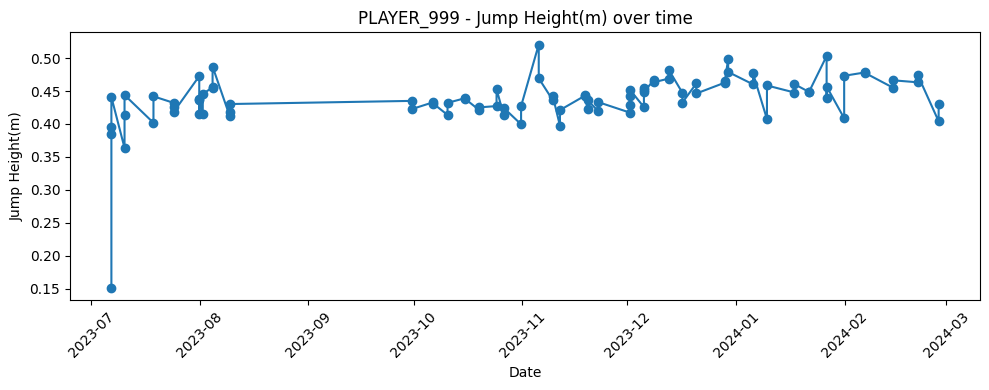

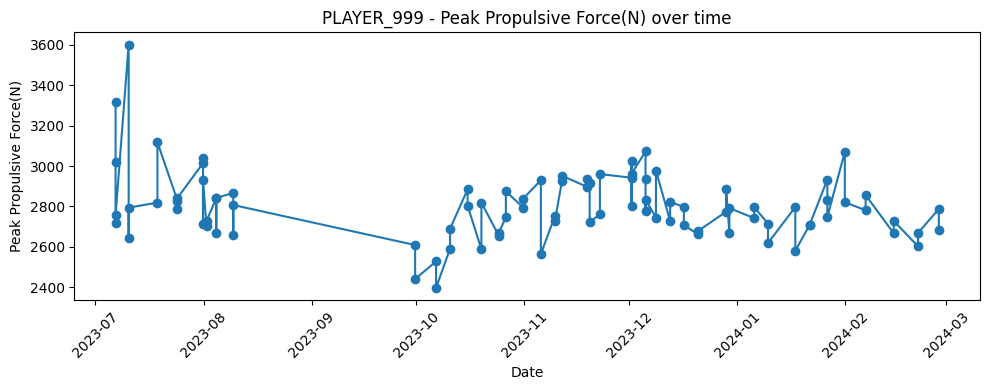

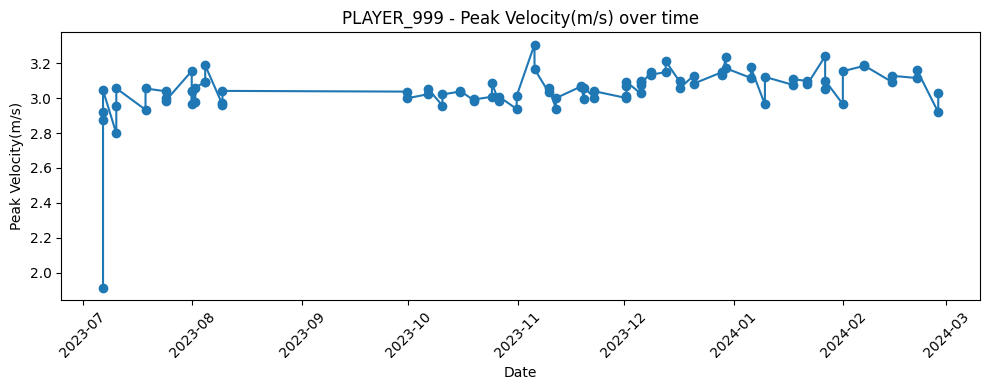

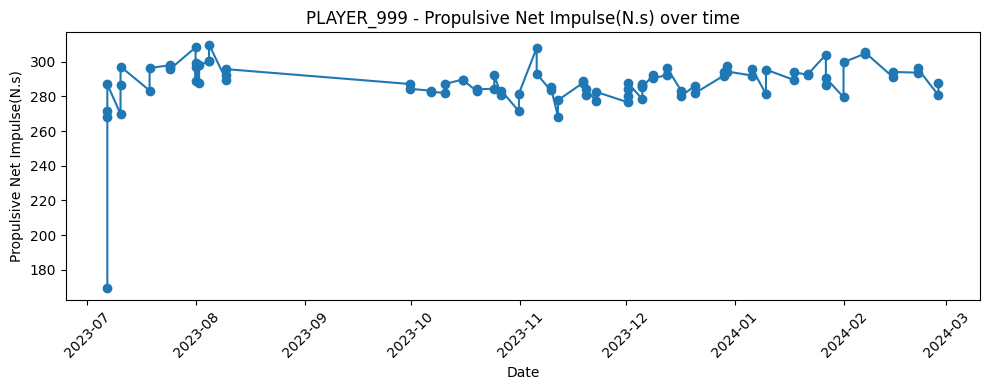

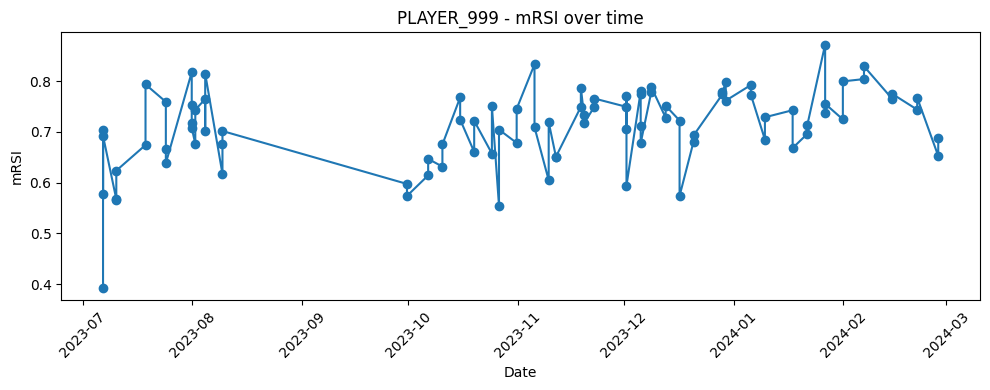

,Metric,Best Value,Best Date,Worst Value,Worst Date,Trend Slope,R,p_value
0,Jump Height(m),0.5207,2023-11-05 16:54:00,0.1511,2023-07-06 18:10:48,0.000233,0.412325,0.000040
1,Peak Propulsive Force(N),3601.0000,2023-07-10 12:11:57,2397.0000,2023-10-06 15:34:19,-0.498773,-0.209235,0.044131
2,Peak Velocity(m/s),3.3081,2023-11-05 16:54:00,1.9119,2023-07-06 18:10:48,0.000829,0.403524,0.000061
3,Propulsive Net Impulse(N.s),309.9197,2023-08-04 15:11:10,169.5575,2023-07-06 18:10:48,0.033644,0.158074,0.130196
4,mRSI,0.8721,2024-01-26 20:21:54,0.3927,2023-07-06 18:10:48,0.000413,0.385889,0.000133


In [36]:
summary_999 = plot_athlete_metrics(df_team, "PLAYER_999", selected_metrics, months_back=12)
summary_999



===== Athlete: PLAYER_404 =====
Date range: 2025-06-23 14:19:39 → 2025-10-13 22:28:25
Rows: 155


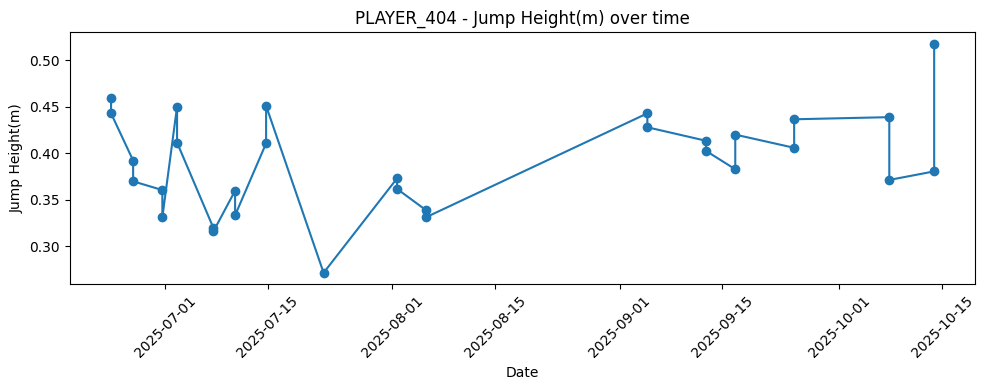

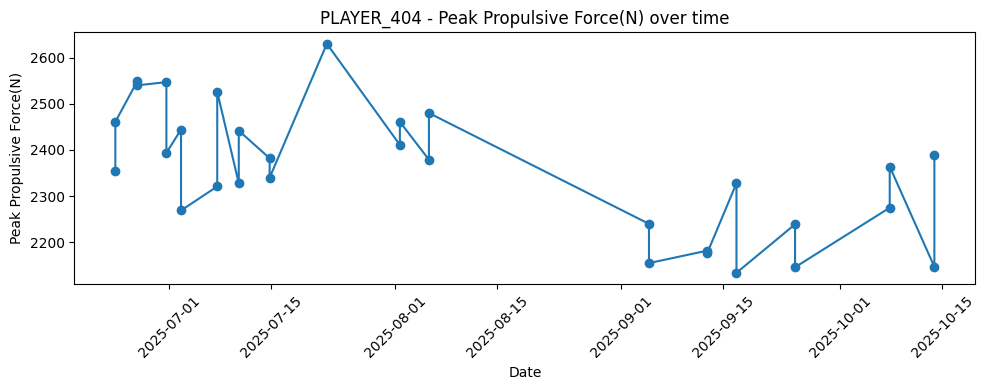

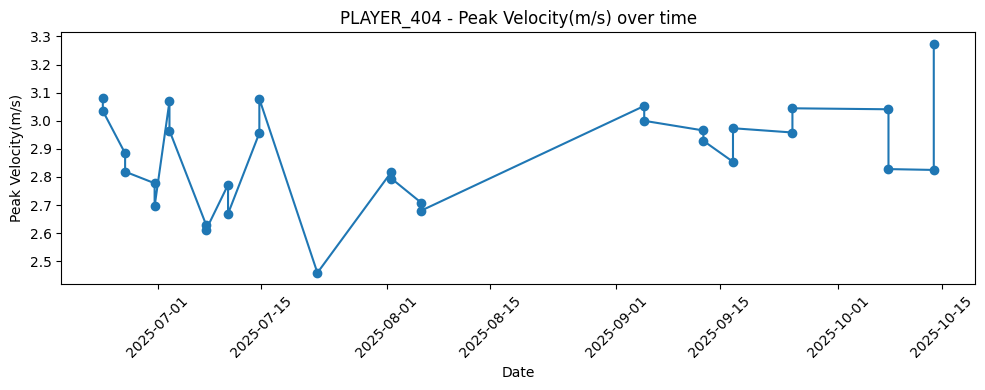

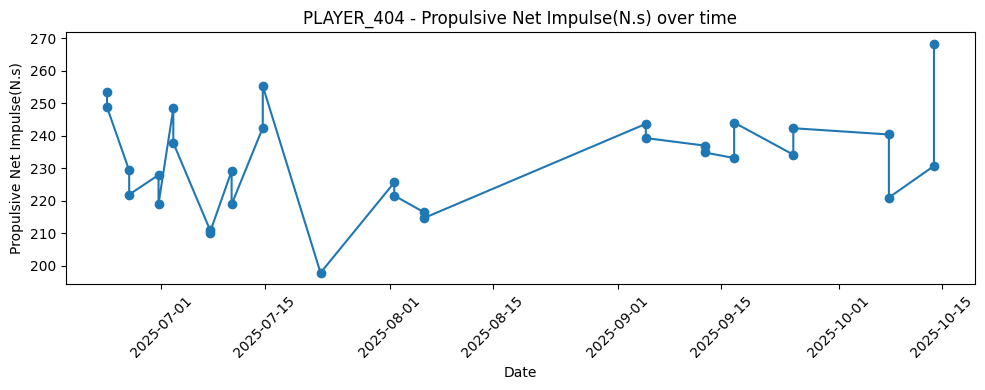

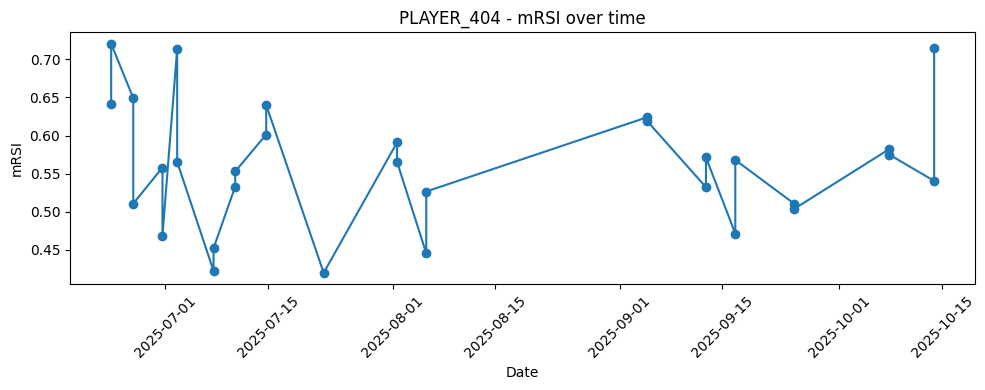

,Metric,Best Value,Best Date,Worst Value,Worst Date,Trend Slope,R,p_value
0,Jump Height(m),0.5179,2025-10-13 22:28:25,0.2713,2025-07-22 14:32:59,0.000442,0.328488,0.071196
1,Peak Propulsive Force(N),2630.0000,2025-07-22 14:32:59,2134.0000,2025-09-16 18:58:37,-2.252692,-0.651119,0.000073
2,Peak Velocity(m/s),3.2737,2025-10-13 22:28:25,2.4593,2025-07-22 14:32:59,0.001526,0.340501,0.060879
3,Propulsive Net Impulse(N.s),268.3646,2025-10-13 22:28:25,197.8147,2025-07-22 14:32:59,0.096051,0.248124,0.178341
4,mRSI,0.7204,2025-06-23 14:19:48,0.4198,2025-07-22 14:32:59,-0.000020,-0.009887,0.957900


In [37]:
summary_404 = plot_athlete_metrics(df_team, "PLAYER_404", selected_metrics, months_back=12)
summary_404


#### 3.1.4 Relate Findings to Lit Review

##### Player_999
Most of PLAYER_999’s metrics (jump height, peak velocity, net impulse, and mRSI) show slight positive trends, which is consistent with literature indicating that neuromuscular performance improves with structured training and adequate recovery. The only declining metric—peak propulsive force—is not surprising, as research shows that high-intensity training periods and accumulated fatigue commonly suppress force production. Overall, PLAYER_999’s trends align well with what the literature predicts for an athlete in this context.


##### PLAYER_404
PLAYER_404 exhibited similar trend patterns to PLAYER_999. This athlete showed slight improvements in jump height, peak velocity, and propulsive net impulse, all of which align with expected adaptations described in athlete monitoring studies. However, mRSI remained mostly stable, which literature notes is common when fatigue and adaptation counterbalance each other. PLAYER_404 also showed a decline in peak propulsive force, consistent with research demonstrating that force output is highly sensitive to fatigue. Overall, PLAYER_404 did not display any trends that were unexpected based on the literature.


##### Overall
Across both athletes, their observed metric trends aligned with what the literature predicts. Neuromuscular metrics showed gradual improvements over time, while fatigue-sensitive measures like peak propulsive force declined. None of the results were surprising in relation to the research.

# 3.1 Individual Athlete Timeline (Pair Work)
## Contributor: Anthony Mapuyan 

In [ ]:
# Establish database connection and import libraries
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine, text
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

load_dotenv()

DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT", "3306")
DB_NAME = os.getenv("DB_NAME")
DB_TABLE = os.getenv("DB_TABLE", "research_experiment_refractor_test")

connection_string = (   
    f"mysql+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
)

engine = create_engine(connection_string)

print("Database connection established successfully.")

In [ ]:
SELECTED_METRICS = [
    "Jump Height(m)",
    "Peak Propulsive Force(N)",
    "Peak Velocity(m/s)",
    "Propulsive Net Impulse(N.s)",
    "mRSI",
]
